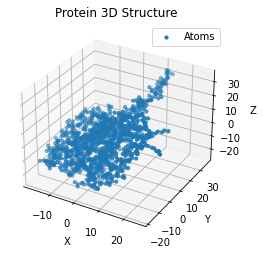

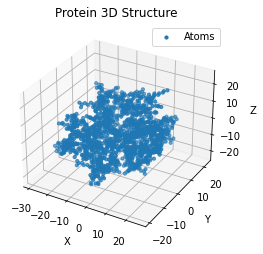

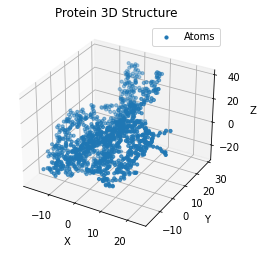

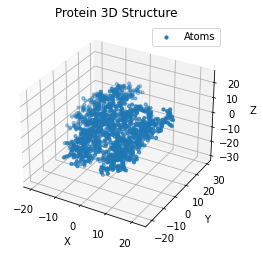

FileNotFoundError: [Errno 2] No such file or directory: 'output_lilli/A_trajectory_299.pdb'

In [5]:
from Bio import PDB
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_protein_structure(pdb_filename):
    # Parse PDB file
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_filename)

    # Extract coordinates
    coordinates = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    coordinates.append(atom.get_coord())

    # Plot 3D structure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates
    x, y, z = zip(*coordinates)

    # Plot atoms
    ax.scatter(x, y, z, marker='o', s=10, label='Atoms')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Protein 3D Structure')

    plt.legend()
    plt.show()

plot_protein_structure('output_lilli/A_trajectory_100.pdb')
plot_protein_structure('output_lilli/A_trajectory_10.pdb')
plot_protein_structure('output_lilli/A_trajectory_101.pdb')
plot_protein_structure('output_lilli/A_trajectory_88.pdb')
#plot_protein_structure('output_lilli/A_trajectory_299.pdb')

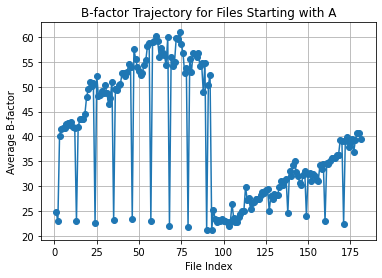

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_b_factor(pdb_file):
    b_factors = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                b_factor = float(line[60:66].strip())
                b_factors.append(b_factor)

    # Calculate the average B-factor
    average_b_factor = np.mean(b_factors)
    return average_b_factor

def analyze_trajectory(directory):
    # Analyze multiple PDB files in the specified directory
    pdb_files = [f for f in os.listdir(directory) if f.startswith('F') and f.endswith('.pdb')]
    pdb_files.sort()

    # Calculate average B-factor for each file
    average_b_factors = []
    for pdb_file in pdb_files:
        average_b_factor = calculate_average_b_factor(os.path.join(directory, pdb_file))
        average_b_factors.append(average_b_factor)

    # Plot the trajectory
    plt.plot(range(1, len(pdb_files) + 1), average_b_factors, marker='o')
    plt.xlabel('File Index')
    plt.ylabel('Average B-factor')
    plt.title('B-factor Trajectory for Files Starting with A')
    plt.grid(True)
    plt.show()

pdb_directory = 'output_lilli'
analyze_trajectory(pdb_directory)
